# Handwriting Recognition using Logistic Regression

This project is my implementation in python of the week3 exercise of the Machine Learning Course I took on Cousera by Andrew Ng.<br>
The data supplied contains 5000 training examples of handwritten digits.<br>
Each example is a 20 by 20 pixel grey image of an handwritten digit between 0 and 9. <br>
The one vs all logistic regression algorithm is implemented to correctly classify the data

## Importing libraries

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.io as sp


## Processing and viewing the image data

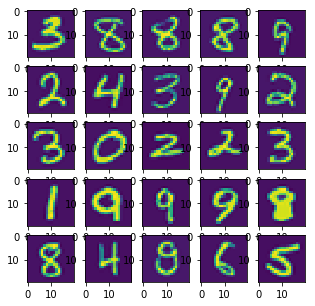

In [74]:
inputLayerSize = 400 # represents 20*20 = 400 input size per example
labels = 10 # 10 labels of 0 - 9

#loading data into variables m, X and y
#displaying sample images
data = sp.loadmat('ex3data1.mat')
y = data['y']
X = data['X']
m = X.shape[0]

fig = plt.figure(figsize=(5, 5))
randArr = np.random.randint(5000, size=(25,1))#create an np array shape (25,1) of integers from less than 5000
j = 1
for i in randArr:
    i = int(i)
    img = X[i]
    img = img.reshape(20,20)
    img = img.T
    fig.add_subplot(5,5,j)
    plt.imshow(img)
    j += 1 

## One vs All logistic Regression

### Computing cost function

In [253]:
#shape of theta is (400,1)
def sigmoid(x,theta):
    z = np.matmul(x,theta)
    z = np.exp(-1 * z) + 1
    return 1 / z

def costFunc(y,x,theta):
    sig = sigmoid(X,theta)
    sig = np.log(sig)
    cost = (-1*y*sig) - (1-y)*np.log(1-sig)
    return np.sum(cost)/m

def costGrad(y,x,theta):
    sig = sigmoid(X,theta)
    sig = sig - y
    sig = sig.T
    grad = np.matmul(sig,x)
    return grad.T/m

def costFuncReg(y,x,theta,lmd):
    theta = theta[1:]
    reg = lmd/m * 0.5 * np.sum(np.square(theta))
    return costFunc(y,x,theta) + reg
    
def costGradReg(y,x,theta,lmd):
    grad2 = (sigmoid(x[...,1:],theta[1:]) - y) #all but the first colum of X
    grad2 = np.matmul(x[...,1:],grad2)/m
    grad2 = lmd/m * theta[1:] + grad2
    grad1 = (sigmoid(x[...,:1],theta[:1]) - y) #first colum of X
    grad1 = np.matmul(x[...,:1],grad1)/m
    return np.concatenate((grad1,grad2), axis = 1)


In [170]:
t = np.random.rand(400,1)
costGrad(y,X,t).shape

(400, 1)

In [159]:
costFun(y,X,t)

-4.449098912387194e-05

In [219]:
a = np.array([[1,2],[2,3],[3,4]])
b = np.array([[0,1]])
np.concatenate((b,a), axis=0)


array([[0, 1],
       [1, 2],
       [2, 3],
       [3, 4]])

In [229]:
y[:1].shape

(1, 1)

In [236]:
np.concatenate((b.T,a.T), axis = 1)

array([[0, 1, 2, 3],
       [1, 2, 3, 4]])

In [237]:
a.T

array([[1, 2, 3],
       [2, 3, 4]])

In [228]:
X[:1].shape

(1, 400)

In [233]:
c = np.array([[1,3,4,5]])
d = np.array([[2]])
c*d

array([[ 2,  6,  8, 10]])

In [251]:
X[...,:1].shape
#t[:1].shape

(5000, 1)

In [246]:
a

array([[1, 2],
       [2, 3],
       [3, 4]])

In [247]:
a[...,:1]

array([[1],
       [2],
       [3]])